# Machine Learning Approaches

Machine learning (ML) is a branch of artificial intelligence that enables systems to learn patterns from data and make predictions or decisions without being explicitly programmed.  
ML approaches are generally categorized into three main types:

1. **Supervised Learning**
2. **Unsupervised Learning**
3. **Reinforcement Learning**

We will explore each type with explanations and simple Python examples.


## 1. Supervised Learning

**Definition:**  
Supervised learning is a type of ML where the model is trained on labeled data.  
Each training example contains an input and a corresponding output. The goal is to learn a mapping from inputs to outputs.

**Applications:**  
- Predicting house prices  
- Email spam detection  
- Stock price prediction  

**Common Algorithms:**  
- Linear Regression  
- Logistic Regression  
- Decision Trees  
- Support Vector Machines (SVM)

## 2. Linear Regression

Linear Regression is the "hello world" of supervised learning. It assumes a linear relationship between the input features (X)
and the output target (y).

**Formula:** `y = w_1*x_1 + w_2*x_2 + ... + w_n*x_n + b`

*   `y`: The predicted value.
*   `x_i`: The input features.
*   `w_i`: The weights or coefficients (what the model learns). Represents the importance of each feature.
*   `b`: The bias or intercept.

<img src="/Users/suraj/Desktop/image1.jpeg" alt="MAE" title="MAE" width="800" height="800"/>

In [118]:
import pandas as pd
import numpy as np

In [119]:
np.random.seed(42)
X = np.random.rand(50, 1) * 10  # Features
y = 2.5 * X + np.random.randn(50, 1) * 2  # Target with noise

# Create a simple dataframe
df = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
print("\n1. Sample Data (First 5 rows):")
print(df.head())

print("\n2. Data Cleaning - Checking for missing values:")
print(f"Missing values in X: {df['X'].isnull().sum()}")
print(f"Missing values in y: {df['y'].isnull().sum()}")

print("\n3. Data Analysis - Basic statistics:")
print(df.describe())


1. Sample Data (First 5 rows):
          X          y
0  3.745401  10.840436
1  9.507143  24.110594
2  7.319939  18.068552
3  5.986585  14.364255
4  1.560186   0.943422

2. Data Cleaning - Checking for missing values:
Missing values in X: 0
Missing values in y: 0

3. Data Analysis - Basic statistics:
               X          y
count  50.000000  50.000000
mean    4.459239  11.142207
std     2.888832   7.325977
min     0.205845  -0.128979
25%     1.837670   5.230184
50%     4.360488  11.150794
75%     6.498549  15.676220
max     9.699099  26.851426


# Linear Regression – Complete Explanation

## 1️⃣ What is Linear Regression?

Linear Regression is a **supervised machine learning algorithm** used for predicting **continuous values**.

It models the relationship between:

- **Independent variables (X)** → Inputs / Features  
- **Dependent variable (y)** → Output / Target  

It assumes a **linear relationship** between X and y.


## 2️⃣ Mathematical Formula

### 🔹 Simple Linear Regression (One Feature)

$$
y = \beta_0 + \beta_1 x
$$

Where:  
- \(y\) = predicted value  
- \(\beta_0\) = intercept  
- \(\beta_1\) = slope (coefficient)  
- \(x\) = input feature


### 🔹 Multiple Linear Regression (Multiple Features)

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n
$$

In [120]:
# Simple linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("\n4. Model Training and Testing")
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model trained! Coefficient: {model.coef_[0][0]:.2f}, Intercept: {model.intercept_[0]:.2f}")


4. Model Training and Testing
Model trained! Coefficient: 2.44, Intercept: 0.25


In [121]:
# Test model
score = model.score(X_test, y_test)
print(f"Model R² score on test data: {score:.3f}")

Model R² score on test data: 0.907


In [122]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the Data
data = {
    'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
    'Salary': [39343, 46205, 37731, 43525, 39891, 56642, 60150, 54445, 64445, 57189, 63218, 55794, 56957, 57081, 61111, 67938, 66029, 83088, 81363, 93940, 91738, 98273, 101302, 113812, 109431, 105582, 116969, 112635, 122391, 121872]
}
df = pd.DataFrame(data)

# 2. Exploratory Data Analysis (EDA)

print(df.head())

df.info()

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


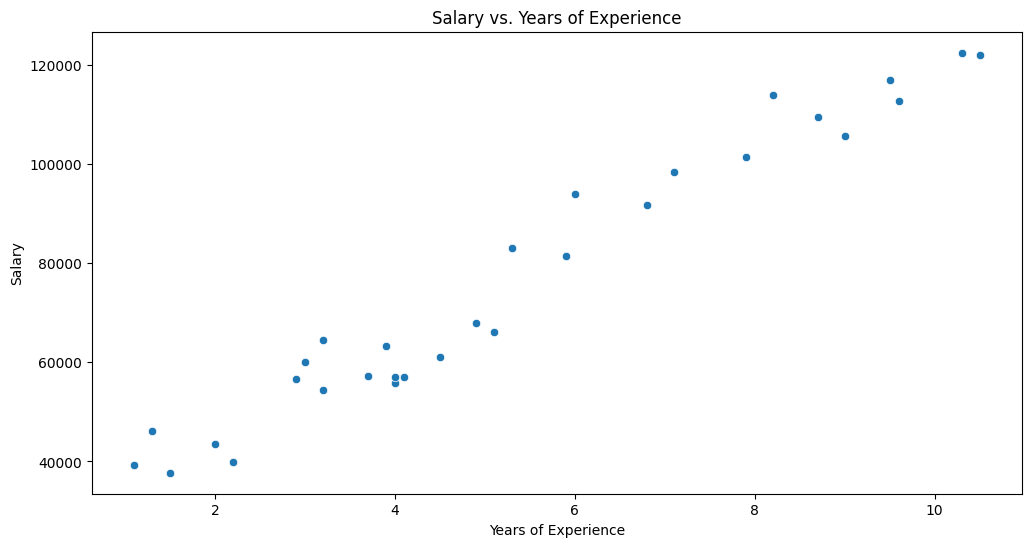

In [123]:
# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [124]:
# 3. Prepare Data for Modeling
# X should be a 2D array, so we use [['YearsExperience']]
X = df[['YearsExperience']]
print(X.shape)
y = df['Salary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

(30, 1)

Training set shape: (24, 1)
Testing set shape: (6, 1)


In [125]:
# 4. Choose & Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training complete.")

# Print the learned parameters
print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")



Model training complete.
Coefficient (w1): 9423.815323030976
Intercept (b): 25321.583011776813


## Mean Squared Error (MSE)

$$
MSE = \frac{1}{n} \sum (y_{actual} - y_{predicted})^2
$$

Actual (y)    Predicted (ŷ)
3              2
5              4
7              8

Step 1: Calculate errors
3 - 2 = 1
5 - 4 = 1
7 - 8 = -1

Step 2: Square them
1² = 1
1² = 1
(-1)² = 1

Step 3: Average
MSE = (1 + 1 + 1) / 3 = 1


👉 MSE = 1

## R-squared (R²) Formula

$$
R^2 = 1 - \frac{SS_{residual}}{SS_{total}}
$$

### Where:

$$
SS_{residual} = \sum (y_{actual} - y_{predicted})^2
$$

$$
SS_{total} = \sum (y_{actual} - \bar{y})^2
$$

$$
\bar{y} = \text{mean of actual values}
$$

In [126]:
# 5. Evaluate the Model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}") # R2 is the proportion, Closer to 1 is better.

Mean Squared Error (MSE): 49830096.86
Root Mean Squared Error (RMSE): 7059.04
R-squared (R2): 0.90


In [127]:
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [128]:
print(y_test)

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64


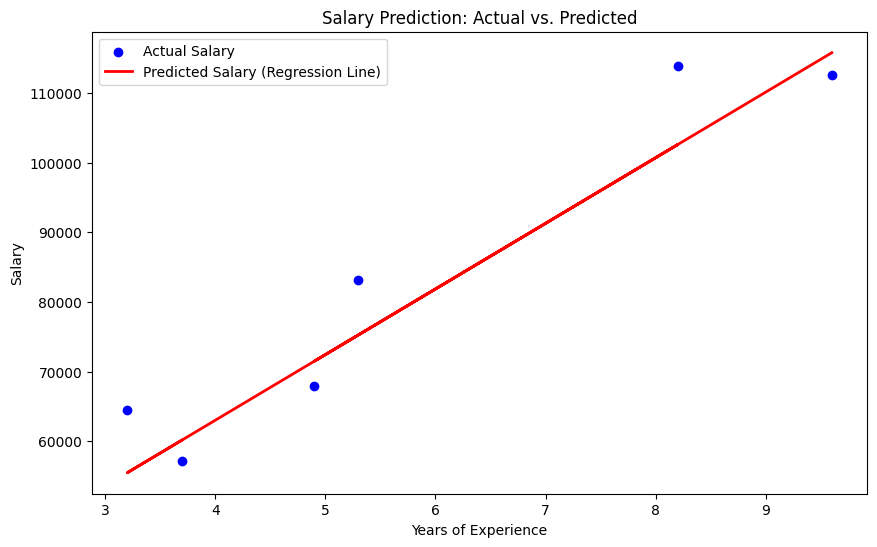

In [129]:
# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary (Regression Line)')
plt.title('Salary Prediction: Actual vs. Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [130]:
# 7. Make a new prediction
new_experience = np.array([[10.3]])
predicted_salary = model.predict(new_experience)
print(f"\nPredicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}")


Predicted salary for 10.3 years of experience: $122386.88


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [131]:
np.random.seed(42)

years = np.linspace(0.5, 20, 100)
salary = 30000 + (years * 9000) + np.random.normal(0, 8000, 100)

df_generated = pd.DataFrame({
    'YearsExperience': years,
    'Salary': salary.astype(int)
})

print(df_generated.head())

   YearsExperience  Salary
0         0.500000   38473
1         0.696970   35166
2         0.893939   43226
3         1.090909   52002
4         1.287879   39717


In [132]:
# Additional data points
more_data = {
    'YearsExperience': [
        0.5, 0.8, 1.0,
        11.0, 11.5, 12.0, 12.5,
        13.0, 13.5, 14.0,
        15.0, 16.0, 17.0, 18.0, 19.0, 20.0
    ],
    'Salary': [
        32000, 35000, 38000,
        125000, 130000, 135000, 138000,
        142000, 148000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000
    ]
}

df_more = pd.DataFrame(more_data)

# Combine with original dataset
df_extended = pd.concat([df, df_more, df_generated], ignore_index=True)

print(df_extended.tail())
print("Total records:", len(df_extended))

     YearsExperience  Salary
141        19.212121  191200
142        19.409091  207050
143        19.606061  208542
144        19.803030  208268
145        20.000000  208123
Total records: 146


In [133]:
# 3. Prepare Data for Modeling
# X should be a 2D array, so we use [['YearsExperience']]
X = df_extended[['YearsExperience']]
print(X.shape)
y = df_extended['Salary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

(146, 1)

Training set shape: (116, 1)
Testing set shape: (30, 1)


In [134]:
# 4. Choose & Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
print("\nModel training complete.")

# Print the learned parameters
print(f"Coefficient (w1): {model.coef_[0]}")
print(f"Intercept (b): {model.intercept_}")


Model training complete.
Coefficient (w1): 9089.371227091564
Intercept (b): 27966.141155657242


In [135]:
# 5. Evaluate the Model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}") # R2 is the proportion, Closer to 1 is better.

Mean Squared Error (MSE): 53100684.19
Root Mean Squared Error (RMSE): 7287.02
R-squared (R2): 0.98


In [136]:
new_experience = np.array([[16]])
predicted_salary = model.predict(new_experience)
print(f"\nPredicted salary for {new_experience[0][0]} years of experience: ${predicted_salary[0]:.2f}")


Predicted salary for 16 years of experience: $173396.08


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
display(new_experience)

array([[16]])

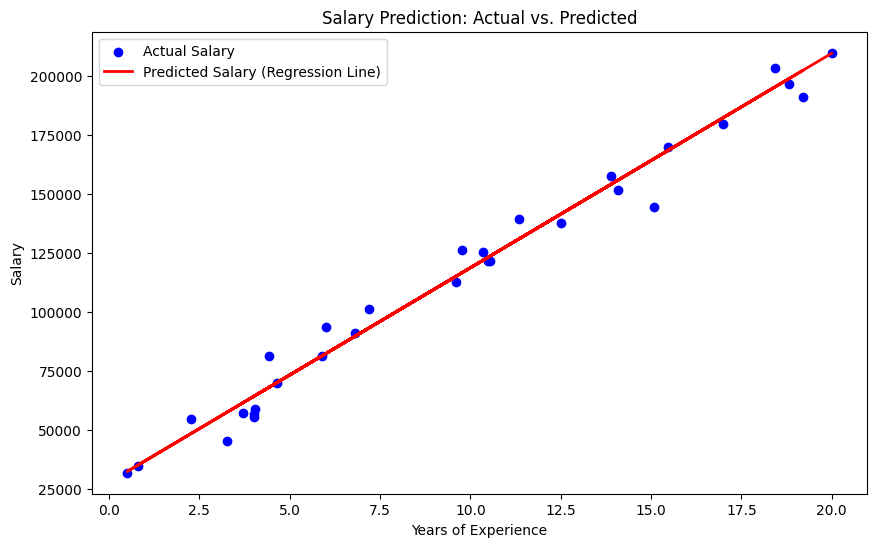

In [138]:
# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Salary (Regression Line)')
plt.title('Salary Prediction: Actual vs. Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [139]:
import joblib

In [140]:
joblib.dump(model, 'salary_linear_regression.pkl')

['salary_linear_regression.pkl']

In [141]:
model = joblib.load('salary_linear_regression.pkl')

In [142]:
display(model)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [143]:
model.predict([[30]])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([300647.2779684])

## Multiple Linear Regression Example

In this example, we predict **House Price** using multiple features:

- $x_1$ = Size of the house (in square feet)  
- $x_2$ = Number of bedrooms  
- $x_3$ = Age of the house (in years)  

Target:
- $y$ = House price

---

### Model Equation

$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + b
$$

Where:

- $y$ : Predicted house price  
- $x_1, x_2, x_3$ : Input features  
- $w_1, w_2, w_3$ : Learned weights (importance of each feature)  
- $b$ : Bias (intercept)

---

### Example With Actual Numbers

Assume the model learned:

$$
w_1 = 120, \quad w_2 = 15000, \quad w_3 = -3000, \quad b = 50000
$$

For a house with:

- Size = 2000 sq ft  
- Bedrooms = 3  
- Age = 10 years  

Prediction:

$$
y = (120 \times 2000) + (15000 \times 3) + (-3000 \times 10) + 50000
$$

$$
y = 240000 + 45000 - 30000 + 50000
$$

$$
y = 305000
$$

So, the predicted house price is:

$$
y = 305000
$$

---

### Vector Form (Compact Representation)

Multiple Linear Regression can also be written as:

$$
y = \mathbf{w}^T \mathbf{x} + b
$$

Where:

$$
\mathbf{w} =
\begin{bmatrix}
w_1 \\
w_2 \\
w_3
\end{bmatrix}
\quad
\mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
$$

In [144]:
# Multiple features dataset
# X1 = Size (sq ft)
# X2 = Bedrooms
# X3 = Age (years)
# y  = House price

X_multi = np.array([
    [2000, 3, 5],
    [1500, 2, 10],
    [2500, 4, 3],
    [1800, 3, 8],
    [2200, 3, 4]
])

y_multi = np.array([300000, 200000, 400000, 280000, 350000])

# Create model
model_multi = LinearRegression()

# Train model
model_multi.fit(X_multi, y_multi)

# Print learned parameters
print("Weights (w1, w2, w3):", model_multi.coef_)
print("Bias (b):", model_multi.intercept_)

# Predict new house price
new_house = [[2100, 3, 6]]
prediction_multi = model_multi.predict(new_house)

print("Prediction for [2100 sq ft, 3 bedrooms, 6 years]:", prediction_multi[0])

Weights (w1, w2, w3): [ 1.75000000e+02  1.25000000e+04 -1.46348106e-11]
Bias (b): -81499.99999999948
Prediction for [2100 sq ft, 3 bedrooms, 6 years]: 323500.0


In [145]:
print("Weights (w1):", model_multi.coef_[0])
print("Weights (w2):", model_multi.coef_[1])
print("Weights (w3):", model_multi.coef_[2])

Weights (w1): 174.99999999999977
Weights (w2): 12500.000000000022
Weights (w3): -1.4634810615608398e-11
